In [1]:
from pymongo import MongoClient

client = MongoClient(port=27017)
db=client.libreria
tags = db["books"].distinct("tag")
print(tags)

['Academic', 'Add a comment', 'Adult Fiction', 'Art', 'Autobiography', 'Biography', 'Business', 'Childrens', 'Christian', 'Christian Fiction', 'Classics', 'Contemporary', 'Crime', 'Cultural', 'Default', 'Erotica', 'Fantasy', 'Fiction', 'Food and Drink', 'Health', 'Historical', 'Historical Fiction', 'History', 'Horror', 'Humor', 'Music', 'Mystery', 'New Adult', 'Nonfiction', 'Novels', 'Paranormal', 'Parenting', 'Philosophy', 'Poetry', 'Politics', 'Psychology', 'Religion', 'Romance', 'Science', 'Science Fiction', 'Self Help', 'Sequential Art', 'Short Stories', 'Spirituality', 'Sports and Games', 'Suspense', 'Thriller', 'Travel', 'Womens Fiction', 'Young Adult']


In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def pipeline(lst):
    tokenized = []
    lemmatizer = WordNetLemmatizer()
    for phrase in lst:
        tokens = phrase.split(" ")
        tokenized_phrase = []
        for token in tokens:
            if token not in stop_words:
                lemmatized = lemmatizer.lemmatize(token.lower())
                tokenized_phrase.append(lemmatized)
        tokenized.append(tokenized_phrase)
    return tokenized

tokenized_tags = pipeline(tags)

In [3]:
import os
import numpy as np

class GloVe:
    # Load the vocabulary and vectors depending on the no of dimensions dim_no.
    def __init__(self):
        V = []
        wordvecs = []
        glove_file_name = os.getcwd() + r"\glove.6B.300d.txt"
        f = open(glove_file_name, encoding='utf-8')

        for line in f:
            line = line.rstrip().split(' ')
            word = line[0]
            vec = [float(num) for num in line[1:]]
            V.append(word)
            wordvecs.append(vec)
        wordvecs = np.asarray(wordvecs)

        self.V = V
        self.wordvecs = wordvecs
    
    # Convert a word to a vector.
    def word2vec(self, word):
        return self.wordvecs[self.V.index(word)]

In [4]:
glove = GloVe()

In [38]:
vectorized_tags = []
for tokens in tokenized_tags:
    vectors = []
    for token in tokens:
        vectors.append(glove.word2vec(token))
    average_vector = np.average(vectors, axis=0)
    vectorized_tags.append(average_vector)
vectorized_tags = np.asarray(vectorized_tags)

In [50]:
n = np.shape(vectorized_tags)[0]
dist_M = np.zeros([n,n])

for i in range(n):
    dist_M[i,:] = np.average((vectorized_tags - vectorized_tags[i,:])**2, axis=1)

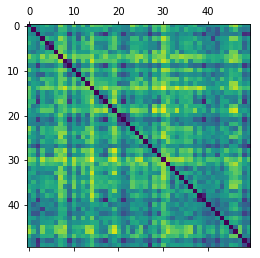

In [61]:
from matplotlib import pyplot as plt

plt.matshow(dist_M)
plt.show()

In [95]:
def nearest_index_tags(index, top_k):
    dist_score = dist_M[index, :]
    return np.argsort(dist_score)[1:top_k+1]

In [109]:
ind_0 = 19

print(f"Nearest tags of '{tags[ind_0]}':")
for index in nearest_index_tags(ind_0, 5):
    print(tags[index])

Nearest tags of 'Health':
Self Help
New Adult
Food and Drink
Add a comment
Business
